<a href="https://colab.research.google.com/github/VitikaJain25/PandasRevision/blob/master/LabelEncoderAndOneHotEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
from google.colab import files  #To read file from local
import io
uploaded = files.upload()   # To upload file from local.

gosales = pd.read_csv(io.BytesIO(uploaded['GoSales_Tx_LogisticRegression.csv']))

Saving GoSales_Tx_LogisticRegression.csv to GoSales_Tx_LogisticRegression.csv


In [3]:
gosales.sample(10)
# Age is the only numeric feature here. Rest all are categorical
# We can use this to build Classification model to predict if the person will purchase tent or not.

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
57820,False,M,34,Married,Trades
56364,False,F,20,Single,Retail
23784,False,F,28,Single,Professional
56859,False,M,25,Single,Sales
9643,False,M,22,Single,Student
19914,False,M,39,Single,Sales
55730,False,M,36,Single,Professional
16151,False,F,36,Single,Other
46458,False,F,32,Married,Retail
30490,False,M,40,Married,Executive


In [4]:
gosales.shape

(60252, 5)

In [5]:
gosales.describe()
# As we have only one numeric feature

,AGE
count,60252.000000
mean,34.187479
std,10.105477
min,17.000000
25%,26.000000
50%,33.000000
75%,41.000000
max,69.000000


In [0]:
import matplotlib.pyplot as plt

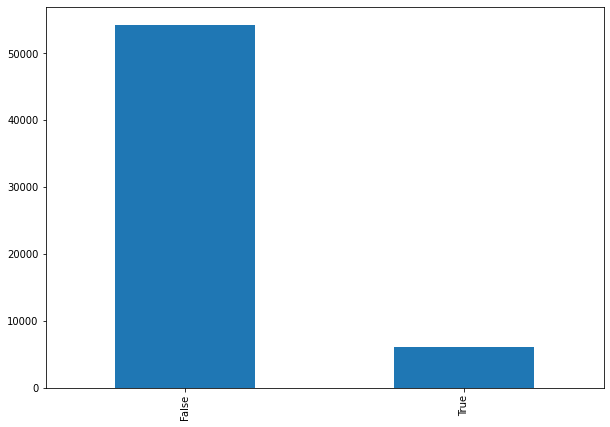

In [9]:
plt.figure(figsize=(10,7))
pd.value_counts(gosales['IS_TENT']).plot.bar()
plt.show()
# We can see that more than 50k customers did not purchase Tent.

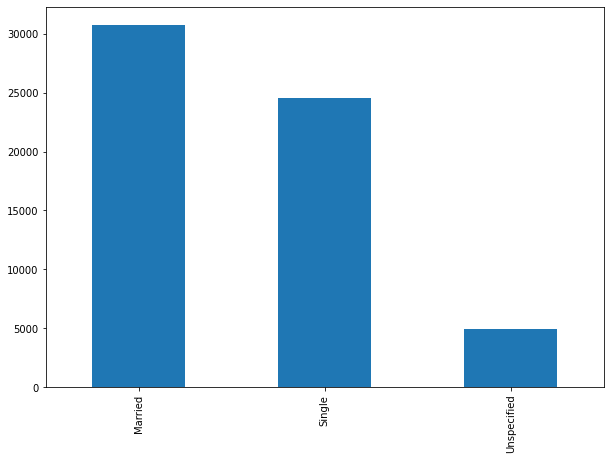

In [10]:
plt.figure(figsize=(10,7))
pd.value_counts(gosales['MARITAL_STATUS']).plot.bar()
plt.show()
# Most of out customers are married

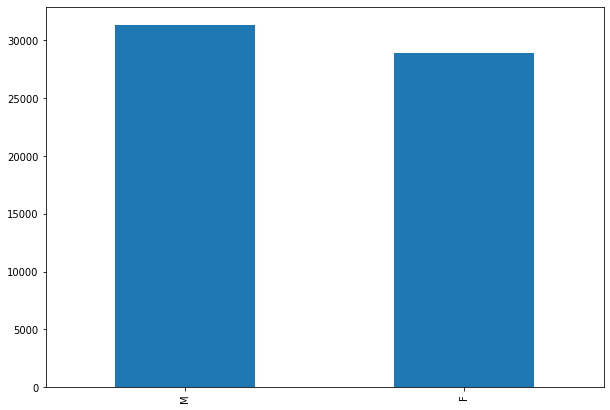

In [11]:
plt.figure(figsize=(10,7))
pd.value_counts(gosales['GENDER']).plot.bar()
plt.show()
# How are the customers distributed based on their genders
# Bar Graph shows that the customers are evenly distributed between Males and Females

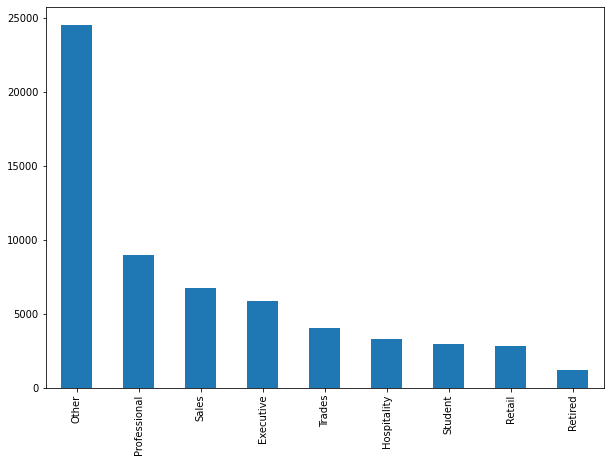

In [12]:
plt.figure(figsize=(10,7))
pd.value_counts(gosales['PROFESSION']).plot.bar()
plt.show()
# Most of our customers have categoried their profession as 'Others'. We do not have additional information.

# Label Encoder

In [0]:
# We will encode the values in Gender column using LABEL ENCODER
gender = ['M', 'F']

In [0]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

label_encoding = label_encoding.fit(gender)

In [0]:
gosales['GENDER'] = label_encoding.transform(gosales['GENDER'].astype(str))

In [16]:
label_encoding.classes_
# 'F' will be represented using '0' and 'M' will be represented using '1'

array(['F', 'M'], dtype='<U1')

In [17]:
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
24320,False,1,44,Married,Professional
27057,False,0,44,Unspecified,Hospitality
47146,False,0,30,Unspecified,Sales
50536,False,1,32,Married,Other
49310,False,1,27,Single,Trades
42373,False,1,33,Married,Other
19430,False,1,21,Unspecified,Other
6454,False,1,24,Single,Professional
47698,False,0,40,Married,Other
38160,False,0,45,Married,Other


 When a feature that you're using in your ML model has more than two categories and you label encode your features, scikit-learn estimators will often assume that the numbers that you assigned as labels have some implicit ordering so you need to be careful when you're using the label encoder with scikit-learn estimators. This is generally not a problem with binary categories represented using just 0 and 1, but let's say you had categories from 0 through 9, Scikit-learn estimators will assume that 9 is larger than 0.

In [20]:
gosales[['MARITAL_STATUS']].sample(5)
# We have 3 categories here. 'Single', 'Married', 'Unspecified'

,MARITAL_STATUS
39528,Single
50788,Single
11019,Unspecified
44748,Single
31531,Married


In [0]:
# Here we do not have any implicit ordering between the data, we may use One hot encoding
one_hot_encoding = preprocessing.OneHotEncoder()
one_hot_encoding = one_hot_encoding.fit(gosales['MARITAL_STATUS'].values.reshape(-1,1))
# Instead of using a separate array to represent our categories, we can fit on the marital status column itself.

In [22]:
# To see which categories are encoded
one_hot_encoding.categories_

[array(['Married', 'Single', 'Unspecified'], dtype=object)]

In [24]:
one_hot_labels = one_hot_encoding.transform(gosales['MARITAL_STATUS'].values.reshape(-1,1)).toarray()
one_hot_labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [25]:
# The one-hot encoded values are in the form of a NumPy array, so now we are going to assign these as columns in our data frame.
labels_df = pd.DataFrame()

labels_df['MARITAL_STATUS_Married'] = one_hot_labels[:,0]
labels_df['MARITAL_STATUS_Single'] = one_hot_labels[:,1]
labels_df['MARITAL_STATUS_Unspecified'] = one_hot_labels[:,2]

labels_df.head(10)

,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


In [0]:
# We can now drop the original 'MARITAL_STATUS' column from out dataframe
encoded_df = pd.concat([gosales, labels_df], axis = 1)
encoded_df.drop('MARITAL_STATUS', axis = 1, inplace = True)

In [28]:
encoded_df.sample(10)

,IS_TENT,GENDER,AGE,PROFESSION,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
55628,False,0,48,Professional,1.0,0.0,0.0
22490,False,1,28,Trades,0.0,1.0,0.0
53830,False,1,43,Other,1.0,0.0,0.0
11744,False,0,48,Other,1.0,0.0,0.0
38598,False,1,57,Other,1.0,0.0,0.0
22488,True,1,28,Trades,0.0,1.0,0.0
37089,True,1,21,Other,0.0,1.0,0.0
11902,True,1,34,Executive,1.0,0.0,0.0
811,True,1,20,Trades,0.0,1.0,0.0
192,False,0,21,Other,1.0,0.0,0.0


One hot encoding using get_dummies function

In [29]:
# If we are working with data in the form of a pandas data frame, an easier way to one-hot encode the categorical values is to use the pd.get_dummies function.
gosales = pd.get_dummies(encoded_df, columns = ['PROFESSION'])
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
58843,False,0,42,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
47210,False,1,39,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0
30666,False,1,19,0.0,1.0,0.0,0,0,0,0,0,0,0,1,0
13234,False,1,25,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0
46513,True,1,23,0.0,1.0,0.0,0,0,0,0,0,0,0,0,1
15717,False,1,22,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0
47042,False,0,29,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
32986,False,1,29,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
11620,False,1,28,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0
44283,True,0,20,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0


In [30]:
# Loading again the Original Data
from google.colab import files  #To read file from local
import io
uploaded = files.upload()   # To upload file from local.

gosales = pd.read_csv(io.BytesIO(uploaded['GoSales_Tx_LogisticRegression.csv']))

Saving GoSales_Tx_LogisticRegression.csv to GoSales_Tx_LogisticRegression (1).csv


In [31]:
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
39625,False,M,25,Single,Other
56328,False,M,26,Single,Retail
25202,False,M,24,Single,Student
41054,False,M,17,Single,Student
15528,False,M,26,Single,Professional
6023,False,M,44,Married,Other
35355,False,M,20,Single,Other
17564,False,F,34,Unspecified,Professional
54213,False,M,40,Married,Trades
59069,False,M,23,Single,Student


In [32]:
# Now we will One Hot Encode all of the categorical value
# Here, we are passing the entire data set and not some specific column.
gosales = pd.get_dummies(gosales)
gosales.sample(10)

# Now all categorical values have been converted to one hot encoding form.

,IS_TENT,AGE,GENDER_F,GENDER_M,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
16713,False,33,0,1,0,1,0,0,0,0,1,0,0,0,0,0
26237,False,35,1,0,1,0,0,0,0,1,0,0,0,0,0,0
35139,False,41,0,1,1,0,0,0,0,0,1,0,0,0,0,0
41116,False,19,0,1,0,1,0,0,0,0,0,0,0,1,0,0
12829,False,22,1,0,0,1,0,0,0,0,0,1,0,0,0,0
51001,False,52,0,1,1,0,0,0,0,0,1,0,0,0,0,0
21418,False,19,0,1,0,1,0,0,0,1,0,0,0,0,0,0
11726,False,21,1,0,0,1,0,0,0,1,0,0,0,0,0,0
38450,False,43,0,1,1,0,0,0,0,1,0,0,0,0,0,0
55050,False,58,0,1,1,0,0,0,0,1,0,0,0,0,0,0
